# Building a KNN supervised machine learning model to classify the animals in to categories

### importing essential libraries

In [74]:
# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [75]:
df=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\13. KNN\Zoo.csv")

In [76]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Exploratory Data Analysis

In [77]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [79]:
#Checking for missing values
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [80]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [317]:
df['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

In [318]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [319]:
df['eggs'].value_counts()

1    59
0    42
Name: eggs, dtype: int64

In [320]:
df['legs'].value_counts()

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

In [322]:
df['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [338]:
# Finding the total number of unique animals
len(np.unique(df['animal_name']))

100

In [93]:
#Apply LabelEncoder for Animal name variable
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['animal_name']=label.fit_transform(df['animal_name'])
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [94]:
#Defining Dependent and Independent variables
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [95]:
x.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [96]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

# Building KNN Model

In [193]:
#Split data for training and testing

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20)



In [285]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(x_train,y_train)

knnmodel.score(x_train,y_train)

0.675

In [286]:
pred=knnmodel.predict(x_test)
pred

array([1, 1, 7, 1, 2, 1, 5, 2, 1, 1, 2, 1, 5, 1, 3, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [287]:
#Accuracy 
from sklearn.metrics import accuracy_score

Accuracy=accuracy_score(pred,y_test)
Accuracy

0.5714285714285714

In [288]:
kfold=KFold(n_splits=20)
cvs=cross_val_score(knnmodel,x_train,y_train, cv=kfold)
cvs.mean()

0.425

## Grid Search for Algorithm Tuning

In [289]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [290]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [296]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [297]:
print(grid.best_score_)
print(grid.best_params_)

0.525
{'n_neighbors': 1}


In [293]:
#Visualising the Cross Validaitons

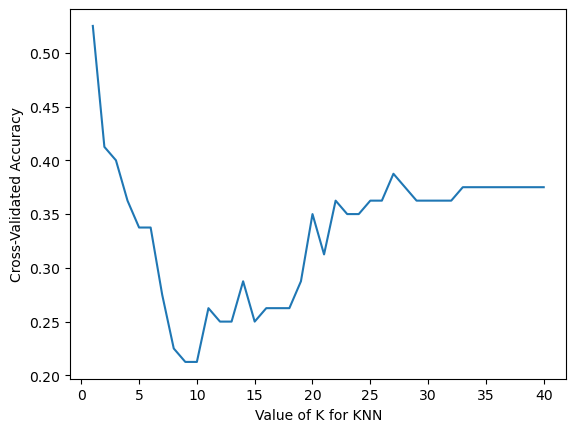

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn1, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## Conclusion:
**The accuracy for the training model with the Single iteration is 67.5%, for  the testing data is 57.1%, With K Fold Cross validation the Accuracy is 52.5%**
    